In [105]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [106]:
# Import the dataset
# Assuming the dataset is in the same directory as this script
path = 'data/diabetes_prediction_dataset.csv'
data = pd.read_csv(path, delimiter=',')

In [107]:
# See the shape of the dataset
data.shape

(100000, 9)

In [108]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [109]:
data.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [110]:
# Delete empty data or unvalid data 
data = data.dropna(axis=0)

In [111]:
# Check the last 5 rows again
data.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [112]:
# Check the size of gender column
df = data.groupby(by='gender').size()
df

gender
Female    58552
Male      41430
Other        18
dtype: int64

In [113]:
# Check the size of smoking_history column
df = data.groupby(by='smoking_history').size()
df

smoking_history
No Info        35816
current         9286
ever            4004
former          9352
never          35095
not current     6447
dtype: int64

In [114]:
# Convert categorical string values to numerical values
# Male: 0
# Female: 1
# Other: 2

data["gender"] = data["gender"].str.replace("Male", "0")
data["gender"] = data["gender"].str.replace("Female", "1")
data["gender"] = data["gender"].str.replace('Other', "2")


In [115]:
# Smoking history
# No info: 0
# not current: 1
# current: 2
# former: 3
# never: 4
# ever: 5


data["smoking_history"]= data["smoking_history"].str.replace("No Info", "0")
data["smoking_history"]= data["smoking_history"].str.replace("not current", "1")
data["smoking_history"]= data["smoking_history"].str.replace("current", "2")
data["smoking_history"]= data["smoking_history"].str.replace("former", "3")
data["smoking_history"]= data["smoking_history"].str.replace("never", "4")
data["smoking_history"]= data["smoking_history"].str.replace("ever", "5")

In [116]:
# Check the updated data
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,4,25.19,6.6,140,0
1,1,54.0,0,0,0,27.32,6.6,80,0
2,0,28.0,0,0,4,27.32,5.7,158,0
3,1,36.0,0,0,2,23.45,5.0,155,0
4,0,76.0,1,1,2,20.14,4.8,155,0


In [117]:
# Overview of the dataset
data.describe

<bound method NDFrame.describe of       gender   age  hypertension  heart_disease smoking_history    bmi  \
0          1  80.0             0              1               4  25.19   
1          1  54.0             0              0               0  27.32   
2          0  28.0             0              0               4  27.32   
3          1  36.0             0              0               2  23.45   
4          0  76.0             1              1               2  20.14   
...      ...   ...           ...            ...             ...    ...   
99995      1  80.0             0              0               0  27.32   
99996      1   2.0             0              0               0  17.37   
99997      0  66.0             0              0               3  27.83   
99998      1  24.0             0              0               4  35.42   
99999      1  57.0             0              0               2  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6       

In [118]:
# Overview of the dataset by statistics
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [119]:
# Define X as a trained data and y as a target data
X = data.iloc[:, :-1]
y = data.iloc[:,-1]

In [ ]:
# Correlation matrix of the dataset
correlation_data = data.corr()

<Axes: >

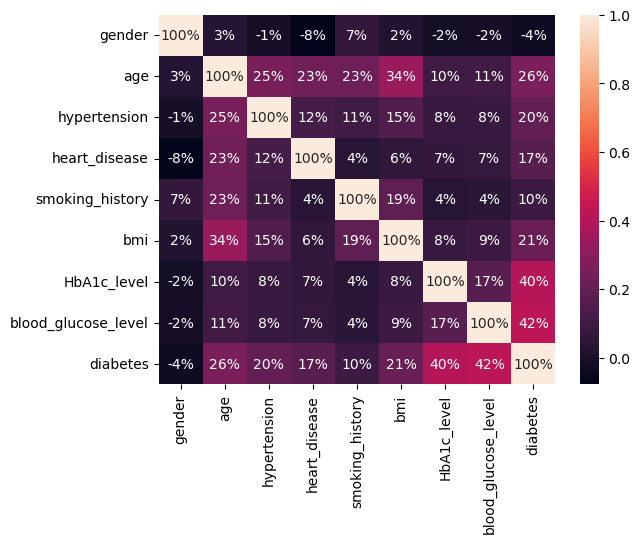

In [135]:
import seaborn as sns 
sns.heatmap(correlation_data, annot=True, fmt='.0%')

In [120]:
# Define the features and target variable using train_test_split() for splitting the dataset by 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [137]:
# Define the model 
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='euclidean')
# Fit the model 
knn.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean')

In [142]:
# Test the model 
y_pred = knn.predict(X_test)
y_pred


array([0, 0, 0, ..., 0, 0, 0], shape=(20000,))

In [140]:
y_test

43660    0
87278    0
14317    0
81932    0
95321    1
        ..
73441    0
1341     0
71987    0
26910    0
24890    0
Name: diabetes, Length: 20000, dtype: int64

In [123]:
# Check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
# Check the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean absolute error: {mae:.2f}")



Accuracy: 95.44%
Mean absolute error: 0.05


In [124]:
new_data = np.array([[1, 51, 1, 1, 4, 25.3, 5.8, 200]])
prediction = knn.predict(new_data)
if prediction == 0:
    print("The patient is not diabetic")
else:
    print("The patient is diabetic")

The patient is not diabetic


In [125]:
# Optimize the quantity of neighbors in KNN Model
def elbow(K):
    test_acc = []

    # train the model for every value of K
    for i in K:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        tmp = knn.score(X_test, y_test)*100
        test_acc.append(tmp)

    return test_acc

K = range(1, 21)
test = elbow(K)
for i in test:
    print(f"{i:.2f}%")


94.11%
95.41%
95.25%
95.49%
95.44%
95.44%
95.47%
95.45%
95.43%
95.39%
95.44%
95.37%
95.44%
95.34%
95.40%
95.30%
95.30%
95.28%
95.29%
95.23%


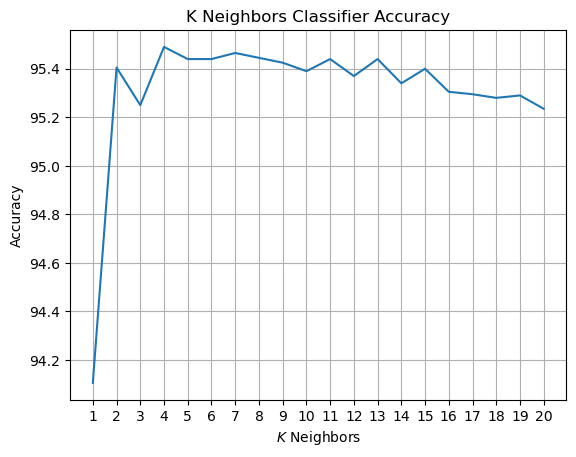

In [126]:
# Visualize the results
plt.plot(K, test)
plt.xlabel("$K$ Neighbors")
plt.ylabel("Accuracy")
plt.title("K Neighbors Classifier Accuracy")
plt.xticks(K)
plt.grid()

In [127]:
# save the model 
import pickle

filename = 'diabetes_model.pkl'
pickle.dump(knn, open(filename, 'wb'))


In [128]:
# load the model 
loaded_model = pickle.load(open(filename, 'rb'))
new_data_2 = np.array([[1, 44, 0, 0, 5, 19.3, 6.5, 200]])
prediction_2 = loaded_model.predict(new_data_2)
if prediction_2 == 0:
    print("The patient is not diabetic")
else:
    print("The patient is diabetic")



The patient is not diabetic
